<a href="https://colab.research.google.com/github/kelvinsima2/ECG_Classification/blob/main/ECG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [211]:
# In this project, the data is in google drive.
# Start by connecting to google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [213]:
# Specify locations of data files
train_path = '/content/drive/My Drive/ECG Project/Data/ecg-data/ecg-data/mitbih_train.csv'
test_path = '/content/drive/My Drive/ECG Project/Data/ecg-data/ecg-data/mitbih_test.csv'


In [214]:
# Save training and testing data into separate dataframes.
df_train = pd.read_csv(train_path, header = None)
df_test = pd.read_csv(test_path, header = None)

In [215]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
# Check training data shape
df_train.shape

(87554, 188)

In [217]:
df_train_features, df_train_labels = df_train.iloc[:,:-1], df_train.iloc[:,[-1]]

In [218]:
# Check which classes are present in the data
df_train_labels[187].unique()

array([0., 1., 2., 3., 4.])

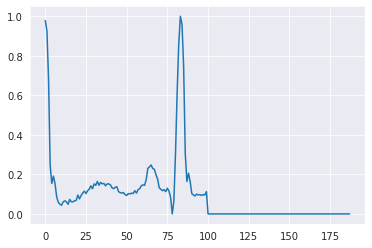

In [219]:
# plot example of ECG signal
df_train.iloc[0].plot(kind = 'line')
plt.show()

In [220]:
# Save location indices of different classes into variables
class_1_indices = df_train_labels.index[df_train_labels[187] == 0].tolist()
class_2_indices = df_train_labels.index[df_train_labels[187] == 1].tolist()
class_3_indices = df_train_labels.index[df_train_labels[187] == 2].tolist()
class_4_indices = df_train_labels.index[df_train_labels[187] == 3].tolist()
class_5_indices = df_train_labels.index[df_train_labels[187] == 4].tolist()


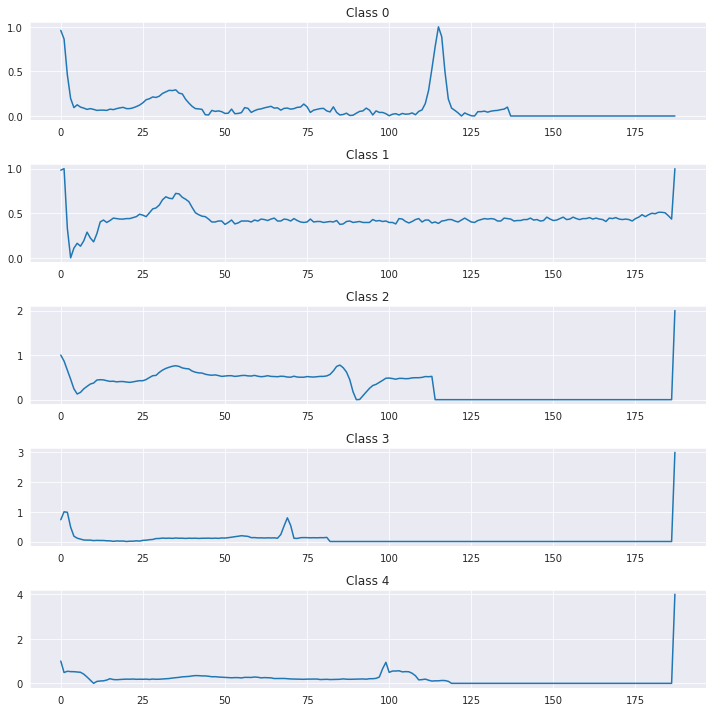

In [293]:
# Visualize examples of different ECG classes
fig, axs = plt.subplots(5, 1)
axs[0].plot(df_train.iloc[class_1_indices[1]])
axs[0].set_title('Class 0')
axs[1].plot(df_train.iloc[class_2_indices[1]])
axs[1].set_title('Class 1')
axs[2].plot(df_train.iloc[class_3_indices[1]])
axs[2].set_title('Class 2')
axs[3].plot(df_train.iloc[class_4_indices[1]])
axs[3].set_title('Class 3')
axs[4].plot(df_train.iloc[class_5_indices[1]])
axs[4].set_title('Class 4')
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()
plt.savefig('/content/drive/My Drive/ECG Project/downloads/classes.png')


## Sample Dataset

In [222]:
print("Number of of class 1 entries = " + str(len(class_1_indices)))
print("\nNumber of of class 2 entries = " + str(len(class_2_indices)))
print("\nNumber of of class 3 entries = " + str(len(class_3_indices)))
print("\nNumber of of class 4 entries = " + str(len(class_4_indices)))
print("\nNumber of of class 5 entries = " + str(len(class_5_indices)))

Number of of class 1 entries = 72471

Number of of class 2 entries = 2223

Number of of class 3 entries = 5788

Number of of class 4 entries = 641

Number of of class 5 entries = 6431


In [223]:
# Stratified sampling of 600 datapoints per class

df_0 = df_train_features.iloc[class_1_indices]
df_1 = df_train_features.iloc[class_2_indices]
df_2 = df_train_features.iloc[class_3_indices]
df_3 = df_train_features.iloc[class_4_indices]
df_4 = df_train_features.iloc[class_5_indices]

sample_size = 600
df_0_sampled = df_0.sample(n = sample_size*2)
df_1_sampled = df_1.sample(n = sample_size)
df_2_sampled = df_2.sample(n= sample_size)
df_3_sampled = df_3.sample(n = sample_size)
df_4_sampled = df_4.sample(n = sample_size)  

df_sampled = pd.concat([df_0_sampled, df_1_sampled, df_2_sampled, df_3_sampled, df_4_sampled], axis = 0)


In [224]:
df_sampled.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
14704,1.000000,0.727619,0.000000,0.076190,0.072381,0.106667,0.156190,0.154286,0.160000,0.154286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8218,0.950673,0.937220,0.558296,0.273543,0.215247,0.253363,0.237668,0.195067,0.163677,0.125561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26038,0.962672,0.840864,0.176817,0.000000,0.088409,0.123772,0.119843,0.110020,0.108055,0.094303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59958,0.954545,0.518182,0.000000,0.150000,0.186364,0.159091,0.145455,0.209091,0.186364,0.213636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45101,0.662214,0.431298,0.047710,0.040076,0.022901,0.003817,0.019084,0.000000,0.005725,0.034351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
# Get sampled indices to a list
sampled_indices = df_sampled.index.to_list()

In [226]:
# Get labels of sampled data
df_sampled_labels = df_train_labels.iloc[sampled_indices]

In [227]:
# See how many classes are present in sampled data
df_sampled_labels[187].unique()

array([0., 1., 2., 3., 4.])

## Converting ECG Signals to Wavelets

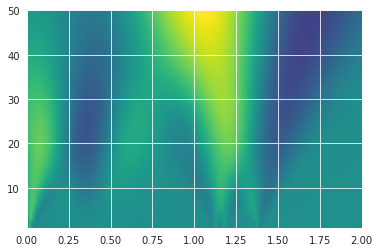

<Figure size 432x288 with 0 Axes>

In [294]:
from scipy import signal
# Plot example of a wavelet transform

sample = df_train_features.iloc[class_3_indices[3]].to_numpy()

t = np.linspace(0, 0.01, 2, endpoint=False)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sample, signal.ricker, widths)

cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip,extent=[0, 2, 1, 50], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()
plt.savefig('/content/drive/My Drive/ECG Project/downloads/wavelet.png')

In [229]:
# define function that makes wavelet transforms when given a row of data
def make_cwts(row):
  sample = row.to_numpy()
  widths = np.arange(1,31)
  cwtmatr = signal.cwt(sample, signal.ricker, widths)
  cwtmatr_yflip = np.flipud(cwtmatr)
  return cwtmatr_yflip

  


In [230]:
# specify folder path where wavelet images will be saved for training
output_dir = '/content/drive/My Drive/ECG Project/Output/'

In [277]:
# This section converts the ECG signals into wavelet transforms and saves the images into labelled folders depending on the class.

from tqdm.auto import tqdm#
import os

for row in tqdm(sampled_indices):
        current_row = df_sampled.loc[row]
        target_dir = 'class_' +  str(int(df_sampled_labels.loc[row].values))            
        dist_dir = os.path.join(output_dir, target_dir)
        file_dist_path = os.path.join(dist_dir, str(row))
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)                
            cwtmatr_yflip = make_cwts(df_sampled.loc[row])

            fig = plt.subplots(figsize=(8, 7))
            img = plt.imshow(cwtmatr_yflip,extent=[0, 2, 1, 50], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
            plt.axis('off')
            plt.savefig(f'{file_dist_path}.png')
            plt.close()

            
          

  0%|          | 0/3600 [00:00<?, ?it/s]

In [278]:
# Split wavelet transform images into training and validation
import tensorflow as tf
SIZE = 256
BATCH_SIZE = 32
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="training",
                                             seed=0,
                                             label_mode = 'categorical');

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="validation",
                                             seed=0,
                                             label_mode = 'categorical');

Found 3600 files belonging to 5 classes.
Using 2880 files for training.
Found 3600 files belonging to 5 classes.
Using 720 files for validation.


In [279]:
# Obtain class names from training data. It is worth noting that they are presented in alphabetical order. This is useful during model testing.
class_names = train_dataset.class_names


In [280]:
# Display shape of training set
train_dataset.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))

In [235]:
# val_batches = tf.data.experimental.cardinality(validation_dataset)
# test_dataset = validation_dataset.take(val_batches // 5)
# validation_dataset = validation_dataset.skip(val_batches // 5)

In [236]:
# print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
# print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

In [281]:
# Use buffered prefetching to load images from disk without having I/O become blocking. This improves performance.
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Model Development and Evaluation

In [282]:
# Use the inception v3 preprocessing function to rescale pixel values
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [283]:
# Create the base model from the pre-trained model inception v3
IMG_SIZE = (256, 256)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.
base_model.trainable=False

# Create Tensorflow functional model
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.BatchNormalization(renorm=True)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
# The output layer has 5 outputs representing the number of classes in the image dataset.
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [284]:
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [285]:
# Get model summary
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.truediv_8 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_8 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 batch_normalization_854 (Ba  (None, 6, 6, 2048)       14336     
 tchNormalization)                                               
                                                           

In [286]:
# early stopping call back
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [287]:
# Train model using GPU
with tf.device('/device:GPU:0'):
  history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                    callbacks = [early])

Epoch 1/10
90/90 [==============================] - 21s 167ms/step - loss: 1.1928 - accuracy: 0.5198 - val_loss: 0.8657 - val_accuracy: 0.7222
Epoch 2/10
90/90 [==============================] - 13s 133ms/step - loss: 0.6498 - accuracy: 0.7889 - val_loss: 0.6212 - val_accuracy: 0.7819
Epoch 3/10
90/90 [==============================] - 12s 131ms/step - loss: 0.4707 - accuracy: 0.8476 - val_loss: 0.5423 - val_accuracy: 0.8000
Epoch 4/10
90/90 [==============================] - 12s 131ms/step - loss: 0.3671 - accuracy: 0.8823 - val_loss: 0.4885 - val_accuracy: 0.8264
Epoch 5/10
90/90 [==============================] - 12s 127ms/step - loss: 0.2990 - accuracy: 0.8986 - val_loss: 0.4521 - val_accuracy: 0.8514
Epoch 6/10
90/90 [==============================] - 12s 132ms/step - loss: 0.2467 - accuracy: 0.9194 - val_loss: 0.4269 - val_accuracy: 0.8611
Epoch 7/10
90/90 [==============================] - 13s 133ms/step - loss: 0.2276 - accuracy: 0.9208 - val_loss: 0.4139 - val_accuracy: 0.8639

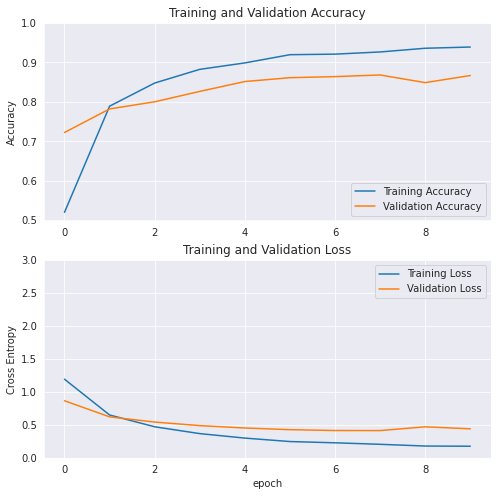

<Figure size 432x288 with 0 Axes>

In [295]:
# Plot accuracy and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('/content/drive/My Drive/ECG Project/downloads/accuracy.png')

# Test Model

In [289]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
# Get test data shape
df_test.shape

(21892, 188)

In [247]:
# Split test features and test labels
df_test_features, df_test_labels = df_test.iloc[:,:-1], df_test.iloc[:,[-1]]

In [248]:
# Check which classes are present in the data
df_test_labels[187].unique()

array([0., 1., 2., 3., 4.])

In [249]:
# Specify test data folder where test signals will be stored for evaluation
test_dir = '/content/drive/My Drive/ECG Project/test/'

## Sample Test Dataset

In [250]:
# Specify location indices of classes
class_1_indices_test = df_test_labels.index[df_test_labels[187] == 0].tolist()
class_2_indices_test = df_test_labels.index[df_test_labels[187] == 1].tolist()
class_3_indices_test = df_test_labels.index[df_test_labels[187] == 2].tolist()
class_4_indices_test = df_test_labels.index[df_test_labels[187] == 3].tolist()
class_5_indices_test = df_test_labels.index[df_test_labels[187] == 4].tolist()

In [251]:
print("Number of of class 1 entries = " + str(len(class_1_indices_test)))
print("\nNumber of of class 2 entries = " + str(len(class_2_indices_test)))
print("\nNumber of of class 3 entries = " + str(len(class_3_indices_test)))
print("\nNumber of of class 4 entries = " + str(len(class_4_indices_test)))
print("\nNumber of of class 5 entries = " + str(len(class_5_indices_test)))

Number of of class 1 entries = 18118

Number of of class 2 entries = 556

Number of of class 3 entries = 1448

Number of of class 4 entries = 162

Number of of class 5 entries = 1608


In [252]:
# Sample test dataset
df_0_test = df_test_features.iloc[class_1_indices_test]
df_1_test = df_test_features.iloc[class_2_indices_test]
df_2_test = df_test_features.iloc[class_3_indices_test]
df_3_test = df_test_features.iloc[class_4_indices_test]
df_4_test = df_test_features.iloc[class_5_indices_test]


sample_size = 100
df_0_test_sampled = df_0_test.sample(n = sample_size)
df_1_test_sampled = df_1_test.sample(n = sample_size)
df_2_test_sampled = df_2_test.sample(n = sample_size)
df_3_test_sampled = df_3_test.sample(n = sample_size)
df_4_test_sampled = df_4_test.sample(n = sample_size)

df_test_sampled = pd.concat([df_0_test_sampled, df_1_test_sampled, df_2_test_sampled, df_3_test_sampled, df_4_test_sampled], axis = 0)

In [253]:
# Get sampled indices to a list
test_sampled_indices = df_test_sampled.index.to_list()

# Get labels of sampled data
df_test_sampled_labels = df_test_labels.iloc[test_sampled_indices]

In [264]:
# This section converts the ECG signals into wavelet transforms and saves the images into labelled folders depending on the class.

for row in tqdm(test_sampled_indices):
        current_row = df_test_sampled.loc[row]
        target_dir = 'class_' +  str(int(df_test_sampled_labels.loc[row].values))            
        dist_dir = os.path.join(test_dir, target_dir)
        file_dist_path = os.path.join(dist_dir, str(row))
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)                
            cwtmatr_yflip = make_cwts(df_test_sampled.loc[row])

            fig = plt.subplots(figsize=(8, 7))
            img = plt.imshow(cwtmatr_yflip,extent=[0, 2, 1, 50], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
            plt.axis('off')
            plt.savefig(f'{file_dist_path}.png')
            plt.close()

  0%|          | 0/500 [00:00<?, ?it/s]

In [265]:
# generate tensorflow dataset from test image directory
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=None,
                                             directory=test_dir,
                                             shuffle=False,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset=None,
                                             seed=0,
                                             label_mode = 'categorical');

Found 500 files belonging to 5 classes.


In [256]:
# # Use buffered prefetching to load images from disk without having I/O become blocking. This improves performance.
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [291]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(test_dataset)

16/16 [==============================] - 2s 91ms/step - loss: 0.4625 - accuracy: 0.8660


In [267]:
# The next set of functions will be used to plot the confusion matrix

from io import BytesIO
def plot_to_image(figure):
    """
    Saves plot as a png file.
    src: tensorflow.org docs
    https://stackoverflow.com/a/61443397/6118987
    https://www.tensorflow.org/tensorboard/image_summaries
    
    """
    # save plot to png file
    buf = BytesIO()
    plt.savefig(buf, format='png')

    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    # plt.close(figure)

    buf.seek(0)
    
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    buf.close()

    return image

In [268]:
def image_grid(data, labels, class_names):
    """
    Saves all images as a grid of class_names * class_names.
    src: tensorflow docs
    """
    assert data.ndim == 4
    figure = plt.figure(figsize=(10,10))
    
    num_images = data.shape[0]
    size = int(np.ceil(np.sqrt(num_images)))
    # class_names[int(tf.argmax(y[0]))
    for i in range(num_images):
        plt.subplot(size, size, i+1, title=class_names[int(tf.argmax(labels[i]))])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        # Grayscale images
        if data.shape[3] == 1:
            plt.imshow(data[i], cmap=plt.cm.binary)
        else:
            plt.imshow(data[i])

    return figure

In [260]:
from sklearn.metrics import confusion_matrix
def get_confusion_matrix(y_labels, logits, class_names):
    """
    Confusion matrix calculation.
    Src: Tensorflow docs
    """
    preds = np.argmax(logits, axis=1)
    labels = np.argmax(y_labels, axis=1).numpy()
    cm = confusion_matrix(
        labels,
        preds, 
        labels=np.arange(len(class_names))
    )

    return cm

In [261]:
import itertools
def plot_confusion_matrix(cm, class_names):
    """
    Saves the confusion matrix as image.
    Src: Tensorflow docs
    """
    size=len(class_names)
    figure=plt.figure(figsize=(size, size))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    indices = np.arange(len(class_names))
    
    plt.xticks(indices, class_names, rotation=45)
    plt.yticks(indices, class_names)
    labels=np.around(
        cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    threshold = cm.max() / 2.0

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.xlabel("True Label")
    plt.ylabel("Prediction label")
    cm_image = plot_to_image(figure)
    
    return  cm_image

16/16 [==============================] - 2s 115ms/step


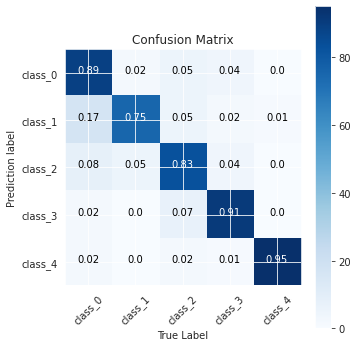

In [296]:
# Plot confusion matrix
from sklearn import metrics
Y_pred = model.predict(test_dataset)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = df_test_sampled_labels[187].to_list()
cm = metrics.confusion_matrix(val_trues, val_preds)
plot_confusion_matrix(cm, test_dataset.class_names)
plt.savefig('/content/drive/My Drive/ECG Project/downloads/cmatrix.png')